In [25]:
import warnings

warnings.filterwarnings('ignore')

In [26]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
f1s, f2s, f3s, f4s, f5s, f6s, f7s = [], [], [], [], [], [], []
for path in glob.glob('../data/CU-BEMS/*.csv'):
    if 'Floor1' in path:
        f1s.append(path)
    elif 'Floor2' in path:
        f2s.append(path)
    elif 'Floor3' in path:
        f3s.append(path)
    elif 'Floor4' in path:
        f4s.append(path)
    elif 'Floor5' in path:
        f5s.append(path)
    elif 'Floor6' in path:
        f6s.append(path)
    else:
        f7s.append(path)
f1s.sort()
f2s.sort()
f3s.sort()
f4s.sort()
f5s.sort()
f6s.sort()
f7s.sort()

In [57]:
def make_df(paths, floor=1, resample=False, sum_col=False):
    result_df = pd.DataFrame()

    for path in paths:
        # df = pd.read_csv(path).interpolate()
        df = pd.read_csv(path)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date')
        df = df['2019-03-06':]
        df = df.reset_index()
        
        for col in df.columns:
            if col != 'Date':
                df[col] = df[col].fillna(df[col].median())
        if floor < 3:
            z1k, z2k, z3k, z4k = [], [], [], []
            z1c, z2c, z3c, z4c = [], [], [], []
            z1h, z2h, z3h, z4h = [], [], [], []
            z1l, z2l, z3l, z4l = [], [], [], []
            
            for col in df.columns:
                # 전력
                if 'kW' in col:
                    if 'z1' in col:
                        z1k.append(col)
                    elif 'z2' in col:
                        z2k.append(col)
                    elif 'z3' in col:
                        z3k.append(col)
                    else:
                        z4k.append(col)
                # 온도
                elif 'degC' in col:
                    if 'z1' in col:
                        z1c.append(col)
                    elif 'z2' in col:
                        z2c.append(col)
                    elif 'z3' in col:
                        z3c.append(col)
                    else:
                        z4c.append(col)  
                # 습도
                elif 'RH%' in col:
                    if 'z1' in col:
                        z1h.append(col)
                    elif 'z2' in col:
                        z2h.append(col)
                    elif 'z3' in col:
                        z3h.append(col)
                    else:
                        z4h.append(col)                  
                # 광량
                elif 'lux' in col:
                    if 'z1' in col:
                        z1l.append(col)
                    elif 'z2' in col:
                        z2l.append(col)
                    elif 'z3' in col:
                        z3l.append(col)
                    else:
                        z4l.append(col)          

            df['z1_kw'] = df[z1k].sum(axis=1)
            df['z1_degc'] = df[z1c].sum(axis=1)
            df['z1_rh'] = df[z1h].sum(axis=1)
            df['z1_lux'] = df[z1l].sum(axis=1)

            df['z2_kw'] = df[z2k].sum(axis=1)
            df['z2_degc'] = df[z2c].sum(axis=1)
            df['z2_rh'] = df[z2h].sum(axis=1)
            df['z2_lux'] = df[z2l].sum(axis=1)

            df['z3_kw'] = df[z3k].sum(axis=1)
            df['z3_degc'] = df[z3c].sum(axis=1)
            df['z3_rh'] = df[z3h].sum(axis=1)
            df['z3_lux'] = df[z3l].sum(axis=1)

            df['z4_kw'] = df[z4k].sum(axis=1)
            df['z4_degc'] = df[z4c].sum(axis=1)
            df['z4_rh'] = df[z4h].sum(axis=1)
            df['z4_lux'] = df[z4l].sum(axis=1)

            df = df[[
                'Date', 'z1_kw', 'z2_kw', 'z3_kw', 'z4_kw',
                'z1_degc', 'z2_degc', 'z3_degc', 'z4_degc',
                'z1_rh', 'z2_rh', 'z3_rh', 'z4_rh',
                'z1_lux', 'z2_lux', 'z3_lux', 'z4_lux'
            ]]
        # need modify
        else:
            z1k, z2k, z3k, z4k, z5k = [], [], [], [], []
            z1c, z2c, z3c, z4c, z5c = [], [], [], [], []
            z1h, z2h, z3h, z4h, z5h = [], [], [], [], []
            z1l, z2l, z3l, z4l, z5l = [], [], [], [], []
            for col in df.columns:
                # 전력
                if 'kW' in col:
                    if 'z1' in col:
                        z1k.append(col)
                    elif 'z2' in col:
                        z2k.append(col)
                    elif 'z3' in col:
                        z3k.append(col)
                    elif 'z4' in col:
                        z4k.append(col)
                    else:
                        z5k.append(col)
                # 온도
                elif 'degC' in col:
                    if 'z1' in col:
                        z1c.append(col)
                    elif 'z2' in col:
                        z2c.append(col)
                    elif 'z3' in col:
                        z3c.append(col)
                    elif 'z4' in col:
                        z4c.append(col)
                    else:
                        z5c.append(col)  
                # 습도
                elif 'RH%' in col:
                    if 'z1' in col:
                        z1h.append(col)
                    elif 'z2' in col:
                        z2h.append(col)
                    elif 'z3' in col:
                        z3h.append(col)
                    elif 'z4' in col:
                        z4h.append(col)
                    else:
                        z5h.append(col)                  
                # 광량
                elif 'lux' in col:
                    if 'z1' in col:
                        z1l.append(col)
                    elif 'z2' in col:
                        z2l.append(col)
                    elif 'z3' in col:
                        z3l.append(col)
                    elif 'z4' in col:
                        z4l.append(col)
                    else:
                        z5l.append(col)                  

            df['z1_kw'] = df[z1k].sum(axis=1)
            df['z1_degc'] = df[z1c].sum(axis=1)
            df['z1_rh'] = df[z1h].sum(axis=1)
            df['z1_lux'] = df[z1l].sum(axis=1)

            df['z2_kw'] = df[z2k].sum(axis=1)
            df['z2_degc'] = df[z2c].sum(axis=1)
            df['z2_rh'] = df[z2h].sum(axis=1)
            df['z2_lux'] = df[z2l].sum(axis=1)

            df['z3_kw'] = df[z3k].sum(axis=1)
            df['z3_degc'] = df[z3c].sum(axis=1)
            df['z3_rh'] = df[z3h].sum(axis=1)
            df['z3_lux'] = df[z3l].sum(axis=1)

            df['z4_kw'] = df[z4k].sum(axis=1)
            df['z4_degc'] = df[z4c].sum(axis=1)
            df['z4_rh'] = df[z4h].sum(axis=1)
            df['z4_lux'] = df[z4l].sum(axis=1)
            
            df['z5_kw'] = df[z5k].sum(axis=1)
            df['z5_degc'] = df[z5c].sum(axis=1)
            df['z5_rh'] = df[z5h].sum(axis=1)
            df['z5_lux'] = df[z5l].sum(axis=1)

            df = df[[
                'Date', 'z1_kw', 'z2_kw', 'z3_kw', 'z4_kw', 'z5_kw',
                'z1_degc', 'z2_degc', 'z3_degc', 'z4_degc', 'z5_degc',
                'z1_rh', 'z2_rh', 'z3_rh', 'z4_rh', 'z5_rh',
                'z1_lux', 'z2_lux', 'z3_lux', 'z4_lux', 'z5_lux'
            ]]
        
        if result_df.empty:
            result_df = df
        else:
            result_df = pd.concat([result_df, df], ignore_index=True)

    if resample:
        result_df['Date'] = pd.to_datetime(result_df['Date'], errors='coerce')
        result_df = result_df.dropna(subset=['Date'])
        result_df = result_df.set_index('Date').resample('H').asfreq()
        if sum_col:
            result_df['sum'] = result_df.sum(axis=1)

    return result_df

In [32]:
if not os.path.exists('./1d'):
    os.makedirs('./1d')
sample = make_df(f2s, floor=2, resample=True, sum_col=False)
make_df(f1s, floor=1, resample=True, sum_col=False).to_csv('./1d/floor1.csv')
make_df(f2s, floor=2, resample=True, sum_col=False).to_csv('./1d/floor2.csv')
make_df(f3s, floor=3, resample=True, sum_col=False).to_csv('./1d/floor3.csv')
make_df(f4s, floor=4, resample=True, sum_col=False).to_csv('./1d/floor4.csv')
make_df(f5s, floor=5, resample=True, sum_col=False).to_csv('./1d/floor5.csv')
make_df(f6s, floor=6, resample=True, sum_col=False).to_csv('./1d/floor6.csv')
make_df(f7s, floor=7, resample=True, sum_col=False).to_csv('./1d/floor7.csv')

In [34]:
def plot_kw(floor, path, seq_len, figsize=(30, 8)):
    if floor < 3:
        rows = 4 + 1
    else:
        rows = 5 + 1
    fig, ax = plt.subplots(rows, figsize=figsize)
    fig.suptitle(f'Floor {floor}')
    df = pd.read_csv(path)[:seq_len]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    for i in range(rows):
        if i+1 < rows:
            ax[i].set_title(f'Zone{i+1}')
            df[f'z{i+1}'].plot(ax=ax[i])
        else:
            ax[i].set_title('Sum')
            df['sum'].plot(ax=ax[i])

    plt.tight_layout()
    plt.show()

In [58]:
sample = make_df(f2s, floor=2, resample=False, sum_col=False)

In [63]:
sample = sample.set_index('Date')

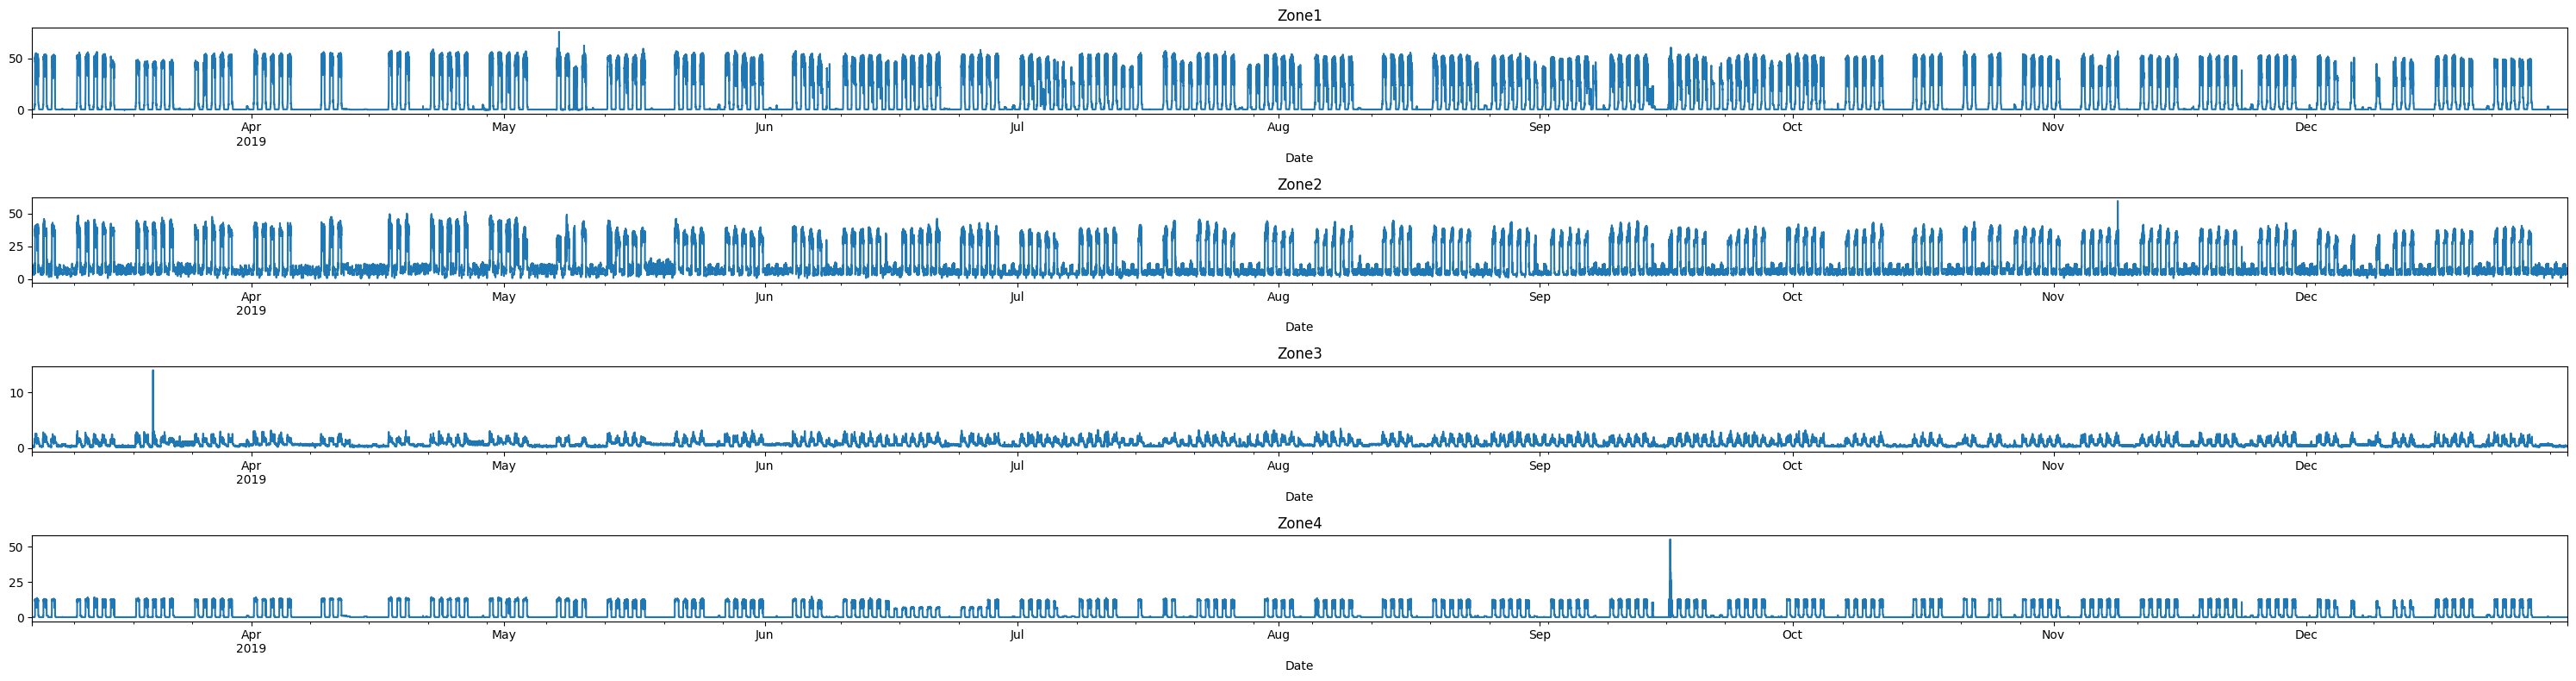

In [67]:
# kw
# degc
# lux
# rh

kw_col = []
for col in sample.columns:
    if 'kw' in col:
        kw_col.append(col)

fig, ax = plt.subplots(sample[kw_col].shape[1], figsize=(30, 8))

for i in range(sample[kw_col].shape[1]):
    ax[i].set_title(f'Zone{i+1}')
    sample[kw_col][f'z{i+1}_kw'].plot(ax=ax[i])

plt.tight_layout()
plt.show()

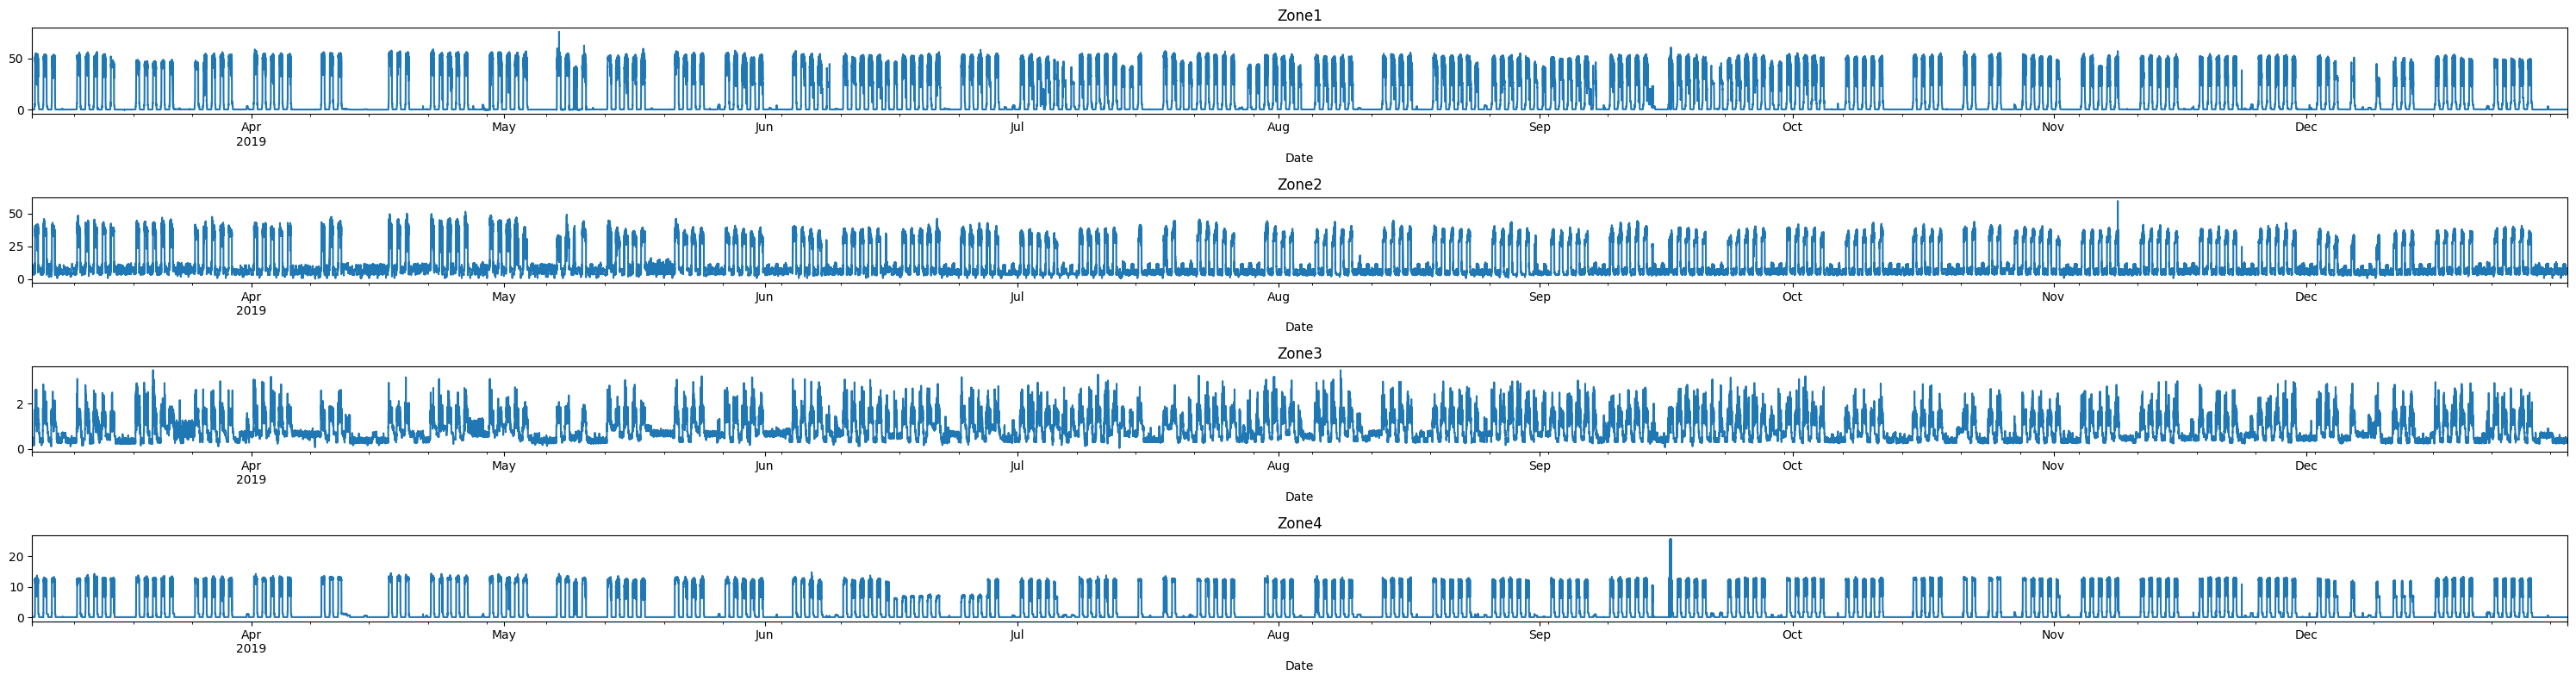

In [77]:
# kw
# degc
# lux
# rh

kw_col = []
for col in ssample.columns:
    if 'kw' in col:
        kw_col.append(col)

fig, ax = plt.subplots(ssample[kw_col].shape[1], figsize=(30, 8))

for i in range(ssample[kw_col].shape[1]):
    ax[i].set_title(f'Zone{i+1}')
    ssample[kw_col][f'z{i+1}_kw'].plot(ax=ax[i])

plt.tight_layout()
plt.show()

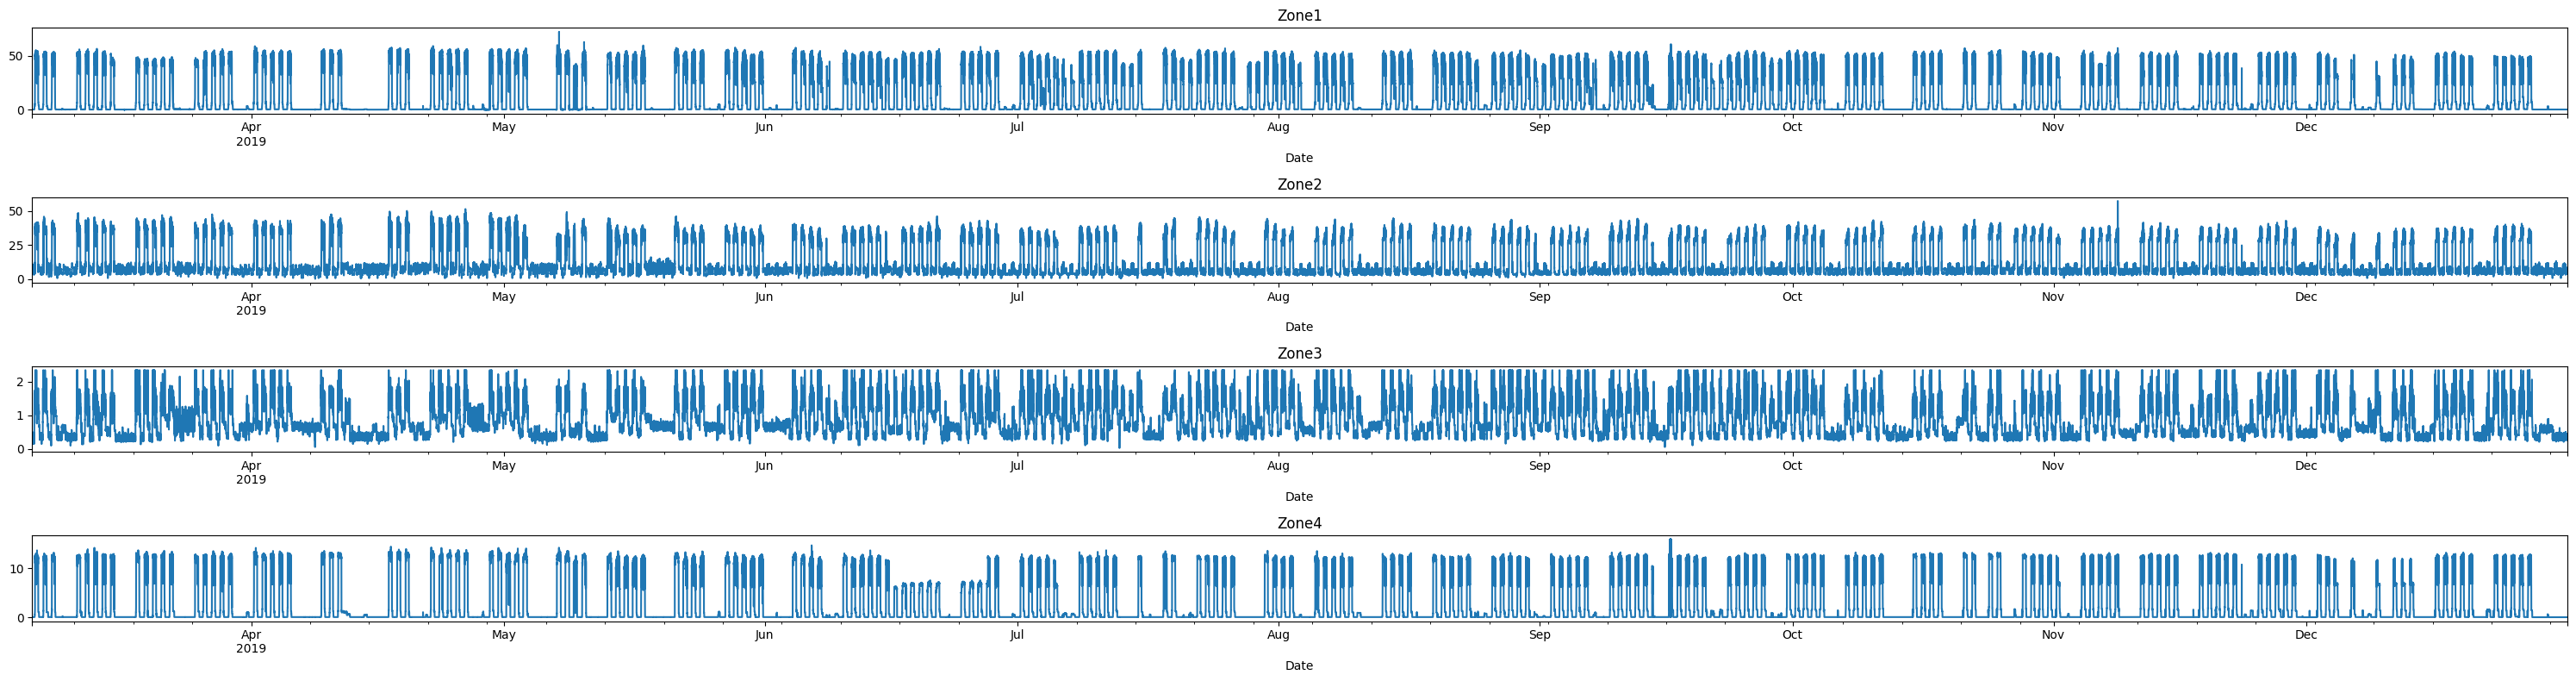

In [80]:
# kw
# degc
# lux
# rh

kw_col = []
for col in ssample.columns:
    if 'kw' in col:
        kw_col.append(col)

fig, ax = plt.subplots(ssample[kw_col].shape[1], figsize=(30, 8))

for i in range(ssample[kw_col].shape[1]):
    ax[i].set_title(f'Zone{i+1}')
    ssample[kw_col][f'z{i+1}_kw'].plot(ax=ax[i])

plt.tight_layout()
plt.show()

In [73]:
def manage_outlier(df, col, how='capping', target='normal'):
    import numpy as np
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    if target=='normal':
        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)
    if target=='extreme':
        maximum = Q3 + (3 * IQR)
        minimum = Q1 - (3 * IQR)

    if how=='capping':
        df.loc[df[col]>maximum, col] = maximum
        df.loc[df[col]<minimum, col] = minimum
    if how=='delete':
        del_idx = df[np.logical_or(df[col]>maximum, df[col]<minimum)].index
        df.drop(index=del_idx, inplace=True)
        df.reset_index(inplace=True)
        df.drop('index',axis=1,inplace=True)

In [74]:
ssample = sample[kw_col].copy()
sample[kw_col].describe().T

,count,mean,std,min,25%,50%,75%,max
z1_kw,433440.0,12.537300,18.298048,0.00,0.28,0.41,29.01,75.90
z2_kw,433440.0,12.617058,12.104411,0.15,3.73,7.32,25.13,59.50
z3_kw,433440.0,0.843408,0.428779,0.03,0.45,0.72,1.21,14.02
z4_kw,433440.0,2.794905,4.641236,0.00,0.03,0.03,6.41,55.36


In [79]:
for col in ssample.columns:
    manage_outlier(ssample, col, target='normal')

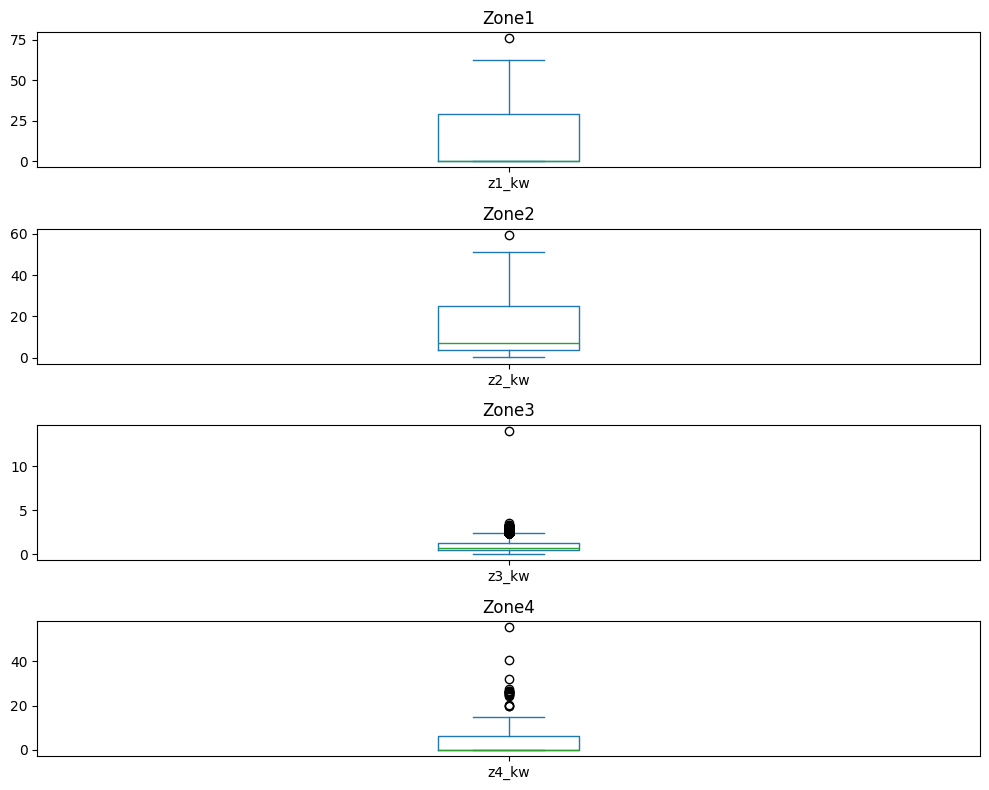

In [81]:
# kw
# degc
# lux
# rh

kw_col = []
for col in sample.columns:
    if 'kw' in col:
        kw_col.append(col)

fig, ax = plt.subplots(sample[kw_col].shape[1], figsize=(10, 8))

for i in range(sample[kw_col].shape[1]):
    ax[i].set_title(f'Zone{i+1}')
    sample[kw_col][f'z{i+1}_kw'].plot.box(ax=ax[i])

plt.tight_layout()
plt.show()

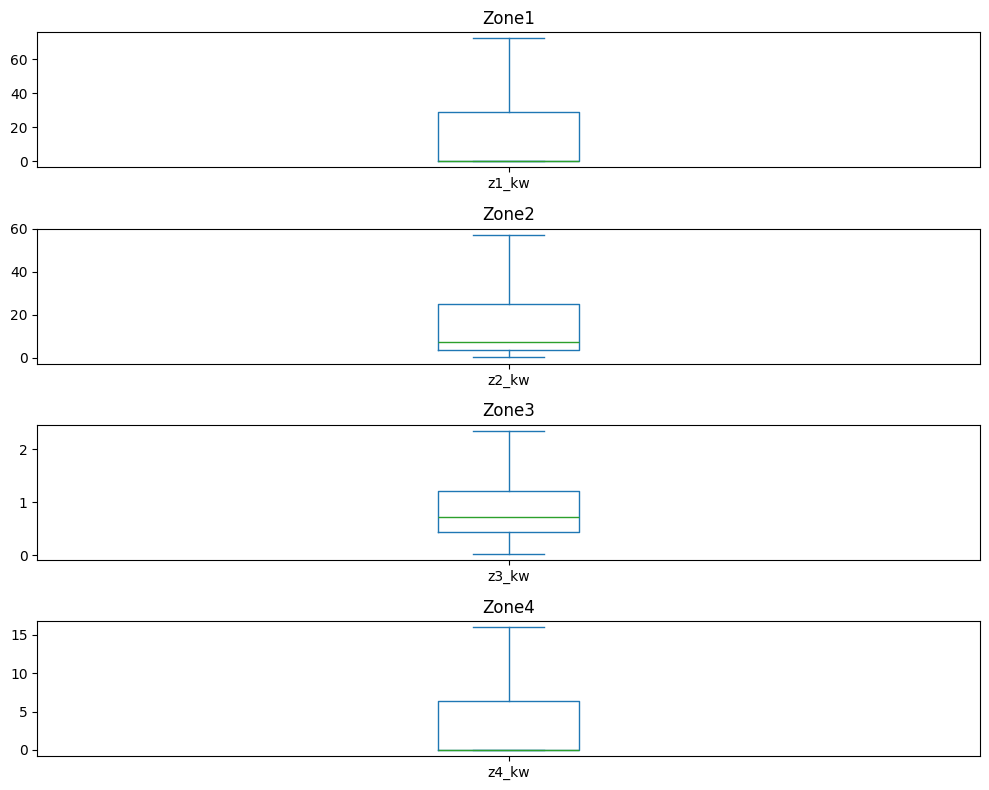

In [82]:
# kw
# degc
# lux
# rh

kw_col = []
for col in ssample.columns:
    if 'kw' in col:
        kw_col.append(col)

fig, ax = plt.subplots(ssample[kw_col].shape[1], figsize=(10, 8))

for i in range(ssample[kw_col].shape[1]):
    ax[i].set_title(f'Zone{i+1}')
    ssample[kw_col][f'z{i+1}_kw'].plot.box(ax=ax[i])

plt.tight_layout()
plt.show()